<a href="https://colab.research.google.com/github/i-nitishh/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('C:\\Users\\Nitish\\Downloads\\Advertising.csv')

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [ ]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

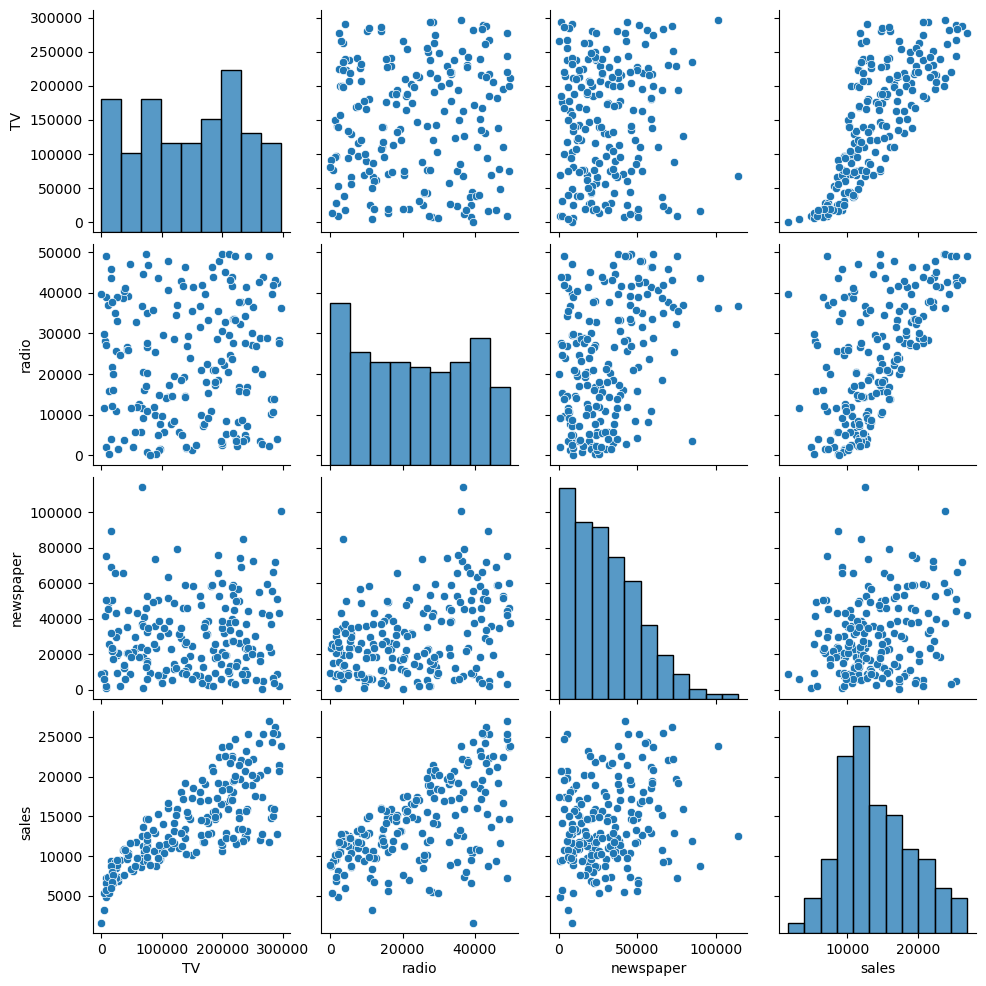

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df.drop(columns = ['sales','newspaper'])
y = df['sales']
print(x,y)

         TV  radio
0    230100  37800
1     44500  39300
2     17200  45900
3    151500  41300
4    180800  10800
..      ...    ...
195   38200   3700
196   94200   4900
197  177000   9300
198  283600  42000
199  232100   8600

[200 rows x 2 columns] 0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=9)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

2957.3621138207127

In [ ]:
lr.coef_

array([0.04565331, 0.18718911])

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
lr.score(x_train,y_train)

0.8897265958178805

In [ ]:
lr.score(x_test,y_test)

0.9258743223517101

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(lr,x,y,cv=9).mean()

0.8839789119628069

In [ ]:
#### Validiation for above model

In [ ]:
import statsmodels.api as sm
x_new = sm.add_constant(x)
model = sm.OLS(y,x_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           4.83e-98
Time:                        13:49:06   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3541.
Df Residuals:                     197   BIC:                             3551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2921.0999    294.490      9.919      0.000    2340.343    3501.857
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In above table we can see that p value of newspaper column is more than 0.05 so we gonna remove this
feature from our model

In [ ]:
#### checking normality of error

In [ ]:
error =y_test-y_predict

In [ ]:
error

84      946.524668
60     2325.807653
54     -141.532716
109     147.395751
156     -86.934183
140    1409.470124
39     1076.653990
116     210.893024
123     145.972308
53     1258.206743
103     -55.271530
101     516.032441
158   -3098.784076
3       895.251291
100   -2215.571124
27    -1144.779681
163     689.762594
174   -2247.100923
37     -914.806422
69     1227.398549
131   -2907.467973
196    1524.869567
190   -1654.140327
23    -1043.508462
198    1733.416850
17     1183.107999
32     1924.352624
31      531.288791
77      406.524497
20     -113.183122
9     -1965.584859
80      356.775807
135   -2360.305206
30     -226.668078
38      177.030983
134   -1067.468943
26       34.139095
151    1546.199004
44     -414.020351
13      868.803045
Name: sales, dtype: float64

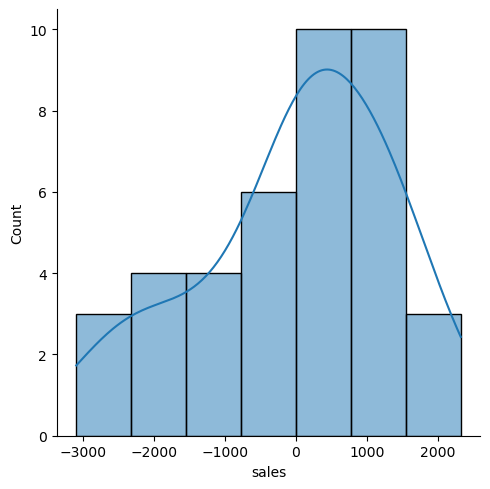

In [ ]:
sns.displot(error,kde=True)

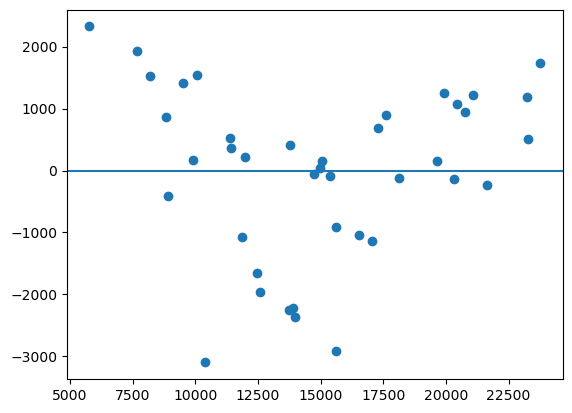

In [ ]:
plt.scatter(y_predict,error)
plt.axhline(y=0)

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
lasso.score(x_train,y_train)

0.8897265958178804

In [ ]:
lasso.score(x_test,y_test)

0.9258743220521203

In [ ]:
#### Doing HyperParameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'alpha':[0.01,0.1,0.5,1,2,4,5,20,40,50,100]}
model = GridSearchCV(Lasso(),param_grid,cv=9,scoring = 'neg_mean_squared_error')

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 4, 5, 20, 40, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
model.best_params_

{'alpha': 2}

In [ ]:
#### Making HyperTuned Model

In [ ]:
lasso = Lasso(alpha = 2)
lasso.fit(x_train,y_train)

Lasso(alpha=2)

In [ ]:
lasso.score(x_train,y_train)

0.8897265958178798

In [ ]:
lasso.score(x_test,y_test)

0.925874321687798

In [ ]:
cross_val_score(lasso,x,y,cv=9).mean()

0.8839789128497535

In [ ]:
lasso.coef_

array([0.04565331, 0.1871891 ])

In [ ]:
#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

In [ ]:
param_grid = {'alpha':[0.01,0.1,0.5,1,2,4,5,20,40,50,100,150,200]}
model = GridSearchCV(Ridge(),param_grid,cv=9,scoring = 'neg_mean_squared_error')

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 4, 5, 20, 40, 50, 100,
                                   150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
model.best_params_

{'alpha': 200}

In [ ]:
#### Making Hyper Tune Model

In [ ]:
ridge = Ridge(alpha = 200)

In [ ]:
ridge.fit(x_train,y_train)

Ridge(alpha=200)

In [ ]:
ridge.score(x_train,y_train)

0.8897265958178805

In [ ]:
ridge.score(x_test,y_test)

0.9258743222735315

In [ ]:
cross_val_score(ridge,x,y,cv=9).mean()

0.8839789119801255

In [ ]:
#### Elastic Net Model

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
en = ElasticNet()

In [ ]:
param_grid = {'alpha':[0.01,0.1,0.5,1,2,4,5,20,40,50,100,150,200] , 'l1_ratio':[0.01,0.2,0.4,0.6,0.9,1]}
model = GridSearchCV(ElasticNet(),param_grid,cv=9,scoring = 'neg_mean_squared_error')

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 4, 5, 20, 40, 50, 100,
                                   150, 200],
                         'l1_ratio': [0.01, 0.2, 0.4, 0.6, 0.9, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
model.best_params_

{'alpha': 200, 'l1_ratio': 1}

In [ ]:
en = ElasticNet(alpha=200,l1_ratio = 1)
en.fit(x_train,y_train)

ElasticNet(alpha=200, l1_ratio=1)

In [ ]:
en.score(x_train,y_train)

0.8897265958108832

In [ ]:
en.score(x_test,y_test)

0.9258742633797876

In [ ]:
cross_val_score(en,x,y,cv=9).mean()

0.8839789111614276

In [ ]:
#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
train=[]
test=[]
cv=[]
for i in range(1,5):
    polynomial_converter = PolynomialFeatures(degree = i,include_bias=False)
    x_poly = polynomial_converter.fit_transform(x)
    x_poly = pd.DataFrame(x_poly)
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.2,random_state=9)
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    train.append(lr.score(x_train,y_train))
    test.append(lr.score(x_test,y_test))
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(lr,x_poly,y).mean())

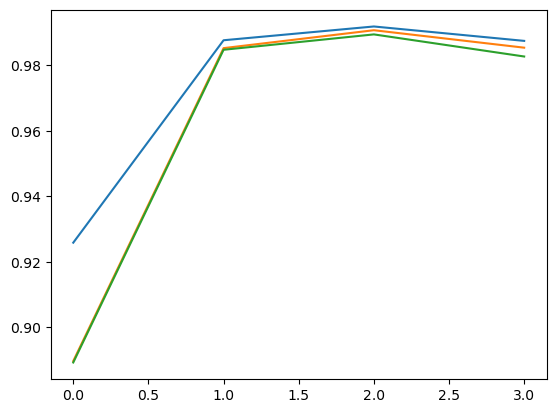

In [ ]:
plt.plot(test)
plt.plot(train)
plt.plot(cv)

In [ ]:
#### Making HyperTune Model with degree 2

In [ ]:
polynomial_converter = PolynomialFeatures(degree = 2,include_bias=False)
x_poly = polynomial_converter.fit_transform(x)
x_poly = pd.DataFrame(x_poly)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.2,random_state=9)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x_poly,y).mean())

0.9852938734387028
0.9876991194511272
0.9847931596676563
